In [1]:
# Statistics and data analysis for financial engineering chapter 3 R lab

In [3]:
library("Ecdat")
data(CPSch3)

In [4]:
head(CPSch3)

year,ahe,sex
1992,12.999118,male
1992,11.617962,male
1992,17.377293,male
1992,10.061266,female
1992,16.756676,male
1992,9.216171,female


In [9]:
dimnames(CPSch3)[[2]]

[1] "year" "ahe"  "sex"

In [14]:
male.earnings = CPSch3[CPSch3[ ,3] == "male", 2]
sqrt.male.earnings = sqrt(male.earnings)
log.male.earnings = log(male.earnings)
invsqrt.male.earnings = 1/sqrt(male.earnings)

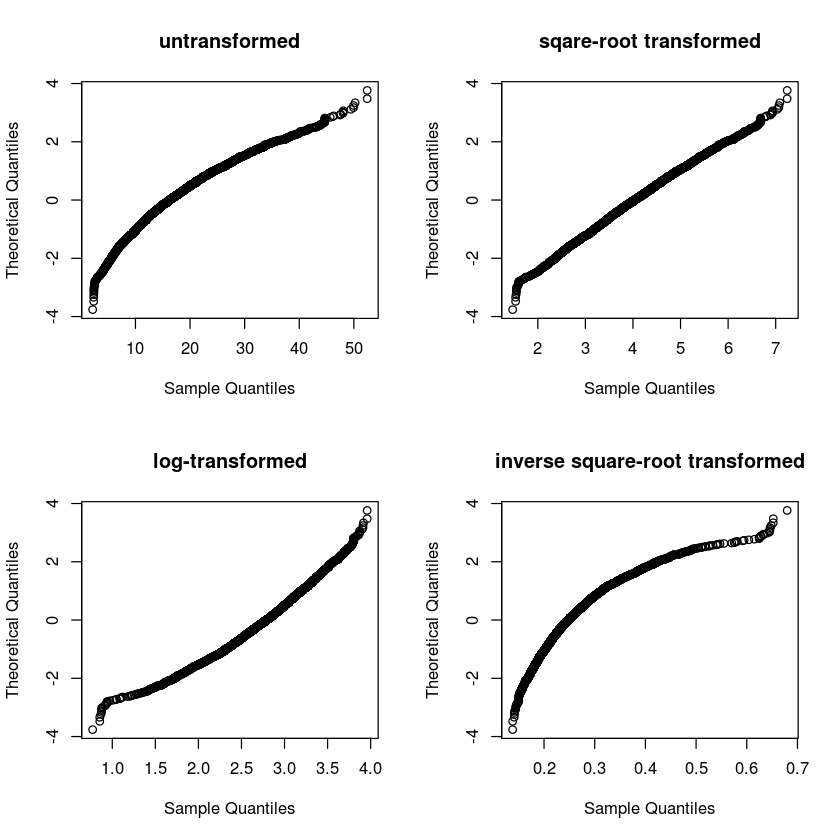

In [15]:
par(mfrow = c(2, 2))
qqnorm(male.earnings, datax = TRUE, main = "untransformed")
qqnorm(sqrt.male.earnings, datax = TRUE, main = "sqare-root transformed")
qqnorm(log.male.earnings, datax = TRUE, main = "log-transformed")
qqnorm(invsqrt.male.earnings, datax = TRUE, main = "inverse square-root transformed")

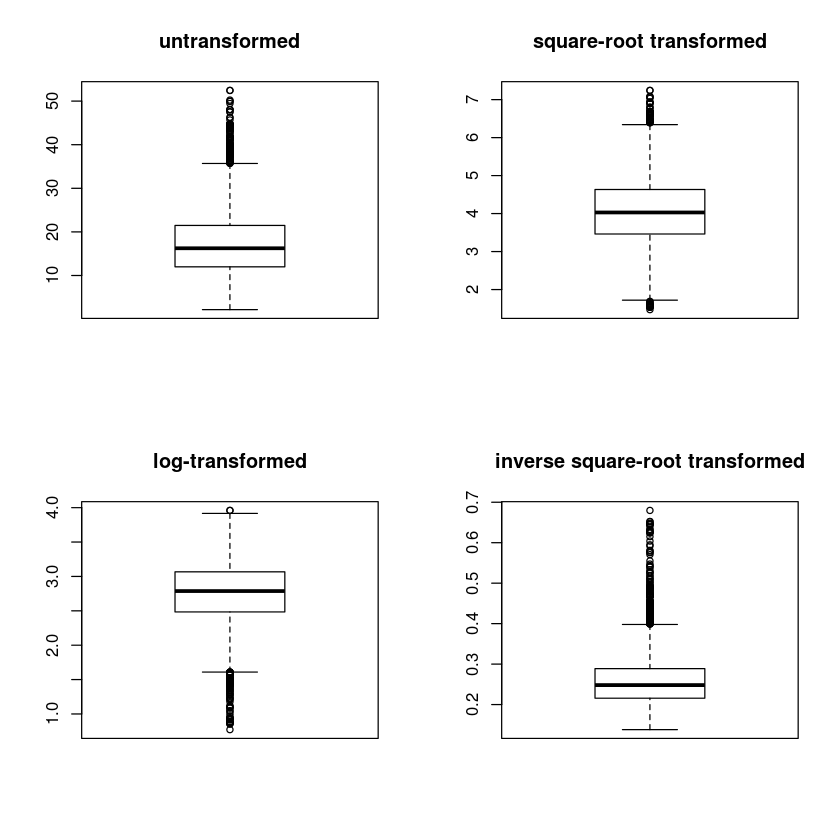

In [16]:
par(mfrow = c(2, 2))
boxplot(male.earnings, main = "untransformed")
boxplot(sqrt.male.earnings, main = "square-root transformed")
boxplot(log.male.earnings, main = "log-transformed")
boxplot(invsqrt.male.earnings, main = "inverse square-root transformed")

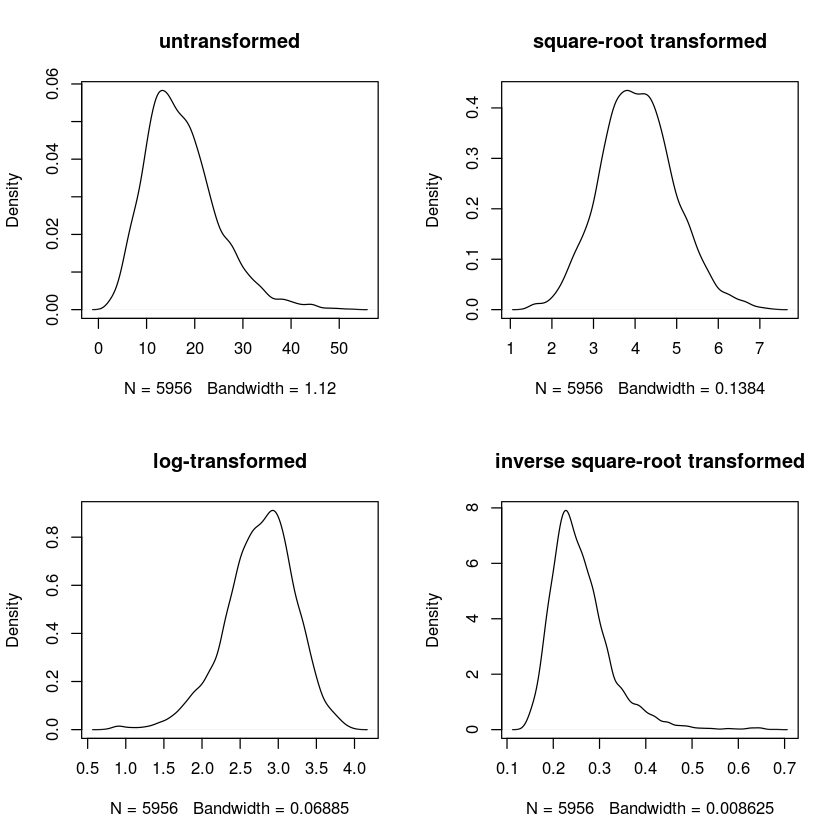

In [17]:
par(mfrow = c(2, 2))
plot(density(male.earnings), main = "untransformed")
plot(density(sqrt.male.earnings), main = "square-root transformed")
plot(density(log.male.earnings), main = "log-transformed")
plot(density(invsqrt.male.earnings), main = "inverse square-root transformed")

In [19]:
library('MASS')

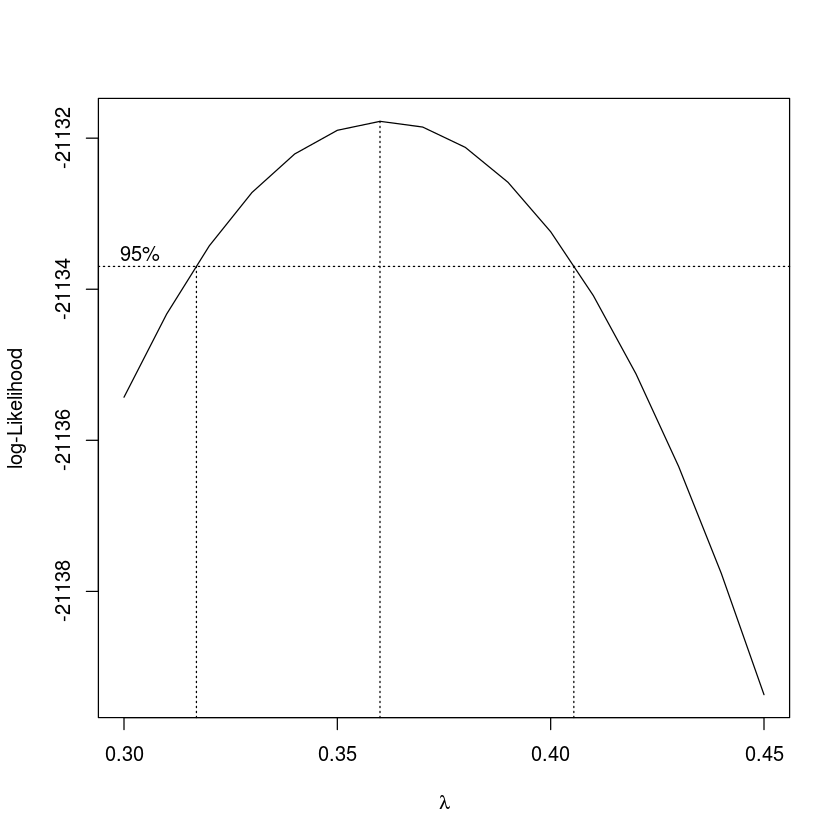

In [26]:
bc = boxcox(male.earnings ~ 1, lambda = seq(0.3, 0.45, 1 / 100), interp = FALSE)

In [28]:
ind = (bc$y == max(bc$y))
ind2 = (bc$y > max(bc$y) - qchisq(0.95, df = 1) / 2)
bc$x[ind]
bc$x[ind2]

[1] 0.36

[1] 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40

In [31]:
# DAX returns
data(Garch, package = "Ecdat")
library(fGarch)
data(EuStockMarkets)
Y = diff(log(EuStockMarkets[ ,1])) # DAX

In [46]:
##### std #####
loglik_std = function(x)
{
    f = -sum(dstd(Y, x[1], x[2], x[3], log = TRUE))
    return(f)
}

start = c(mean(Y), sd(Y), 4)
fit_std = optim(start, loglik_std, method = "L-BFGS-B",
                lower = c(-0.1, 0.001, 2.1),
                upper = c(0.1, 1, 20),
                hessian = TRUE)
cat("MLE =", round(fit_std$par, digits = 5))
minus_logL_std = fit_std$value
AIC_std = 2 * minus_logL_std + 2 * length(fit_std$par)
AIC_std

MLE = 0.00078 0.01058 4.03515

[1] -11960.47

In [48]:
# McDonald's Returns
data = read.csv("../datasets/datasets//MCD_PriceDaily.csv")
adjPrice = data[ ,7]
LogRet = diff(log(adjPrice))
library("MASS")
library("fGarch")
fit.T = fitdistr(LogRet, "t")

Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”Warning message in log(s):
“NaNs produced”

In [52]:
params.T = fit.T$estimate

In [64]:
mean.T = params.T[1]
nu.T = params.T[3]
sd.T = params.T[2] * sqrt(nu.T / (nu.T - 2))

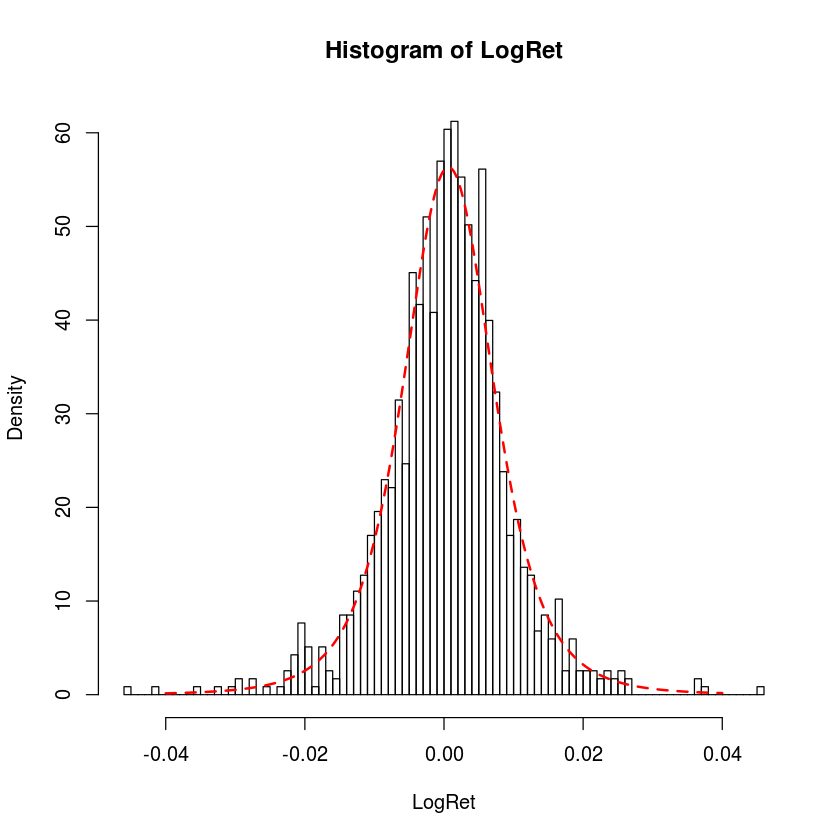

In [65]:
x = seq(-0.04, 0.04, by = 0.0001)
hist(LogRet, 80, freq = FALSE)
lines(x, dstd(x, mean = mean.T, sd = sd.T, nu = nu.T), lwd = 2, lty = 2, col = "red")